<a href="https://colab.research.google.com/github/icezyf/data_projects/blob/main/Bank_Customer_Churn_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bank Customer Churn Prediction** #

In this project, we use supervised learning models to identify customers who are likely to churn in the future. Furthermore, we will analyze top factors that influence user retention. The dataset is originated from [Kaggle](https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers).

*Analyzed by Crystella Yufei Zheng*

### **Contents** ###

#####0. Data and Python Packages Loading#####
#####1. Data Exploration#####
#####2. Feature Preprocessing#####
#####3. Model Training and Results Evaluation#####


## 0. Data and Python Packages Loading ##

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# install pydrive to load data
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
# the same way we get id from last class
# https://drive.google.com/file/d/1s5h59AfiB5qzKIl6BiZkTsAH22_kkidE/view?usp=sharing
id = "1s5h59AfiB5qzKIl6BiZkTsAH22_kkidE"
file = drive.CreateFile({'id':id}) 
file.GetContentFile('bank_churn.csv')

##1. Data Exploration##

###1.1. Understand the Raw Dataset

In [4]:
import pandas as pd

df = pd.read_csv('bank_churn.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
print("--------- Dataset Info ----------")
df.info()
print(f'''
The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.
The columns are:
''')
list(df.columns.values)

--------- Dataset Info ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

The dataset contains 10000 rows and 14 columns.
The columns

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

###1.2.  Understand the features

In [6]:
# check missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# check the unique values for each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

#### **Insights from Columns:** ####
*   Geography -- 3 countries (France, Spain, Germany)
*   Gender, HasCrCard, IsActiveMember and Exited are binary values, which belong to classification. 
*   InActiveMember to be reckoned:
    1. Active Members whose accounts are always cleared
    2. Accounts have never been activated ever since opening
*   Balance is 6382, which means 3618 customers are having 0.00 balance.
*   RowNumber, CustomerId, Surname - no use; can be deleted








In [8]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df[['HasCrCard', 'IsActiveMember', 'Exited']] = df[['HasCrCard', 'IsActiveMember', 'Exited']].astype('object')

In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard           object
IsActiveMember      object
EstimatedSalary    float64
Exited              object
dtype: object

In [11]:
print(f'''
The numerical columns are: 
{list(df.select_dtypes(include=np.number).columns.values)}
The categorical columns are: 
{list(df.select_dtypes(include=np.object).columns.values)}''')


The numerical columns are: 
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
The categorical columns are: 
['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']


In [12]:
# understand numerical columns
df[df.select_dtypes(include=np.number).columns].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


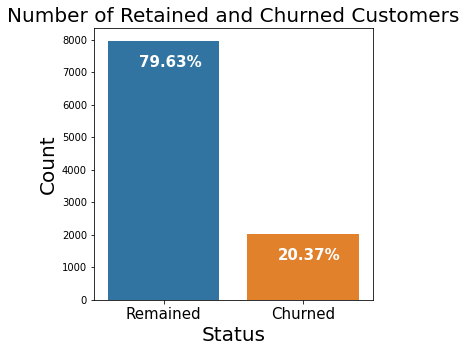

In [13]:
fig = plt.figure(figsize = (5, 5))
sns.countplot(x ='Exited', data = df)
sns.set_theme(style="whitegrid")
for index, value in enumerate(df['Exited'].value_counts()):
    label =  '{}%'.format(round((value/df['Exited'].shape[0])*100, 2)) 
    plt.annotate(label, xy = (index - 0.18, value - 800), color = 'w', fontweight = 'bold', size = 15)

plt.title('Number of Retained and Churned Customers', fontsize=20)
plt.xticks([0, 1], ['Remained', 'Churned'], fontsize=15)
plt.xlabel('Status', fontsize=20)
plt.ylabel('Count', fontsize=20)
display()

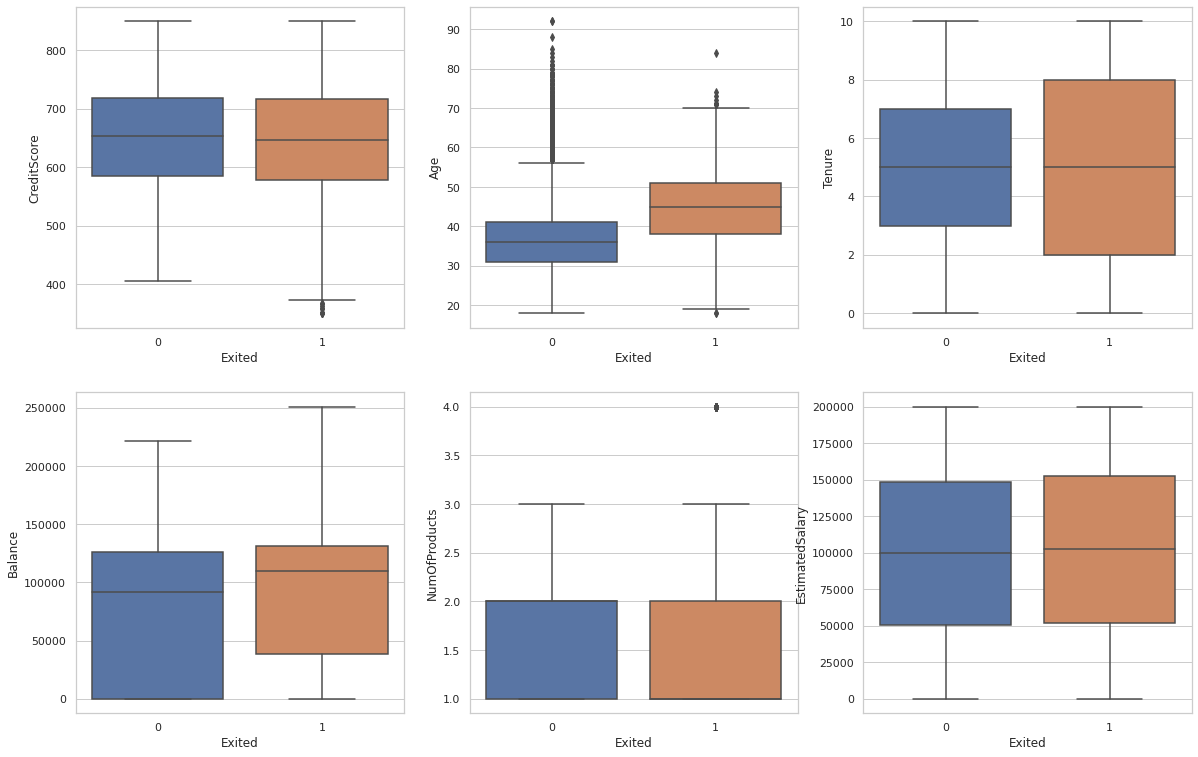

In [14]:
# explore numerical features
sns.set_theme(style="whitegrid")
_, axes = plt.subplots(2,3, figsize=[20,13])
sns.boxplot(x='Exited', y ='CreditScore', data=df, ax=axes[0][0])
sns.boxplot(x='Exited', y ='Age', data=df, ax=axes[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=df, ax=axes[0][2]) 
sns.boxplot(x='Exited', y ='Balance', data=df, ax=axes[1][0])
sns.boxplot(x='Exited', y='NumOfProducts', data=df, ax=axes[1][1]) 
sns.boxplot(x='Exited', y ='EstimatedSalary', data=df, ax=axes[1][2])
display()

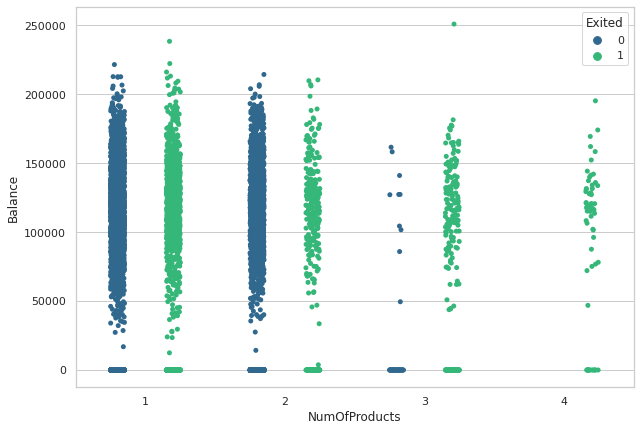

In [15]:
plt.figure(figsize=(10,7))
_=sns.stripplot(x='NumOfProducts', y='Balance', data=df, hue='Exited', dodge=True, palette='viridis')
display()

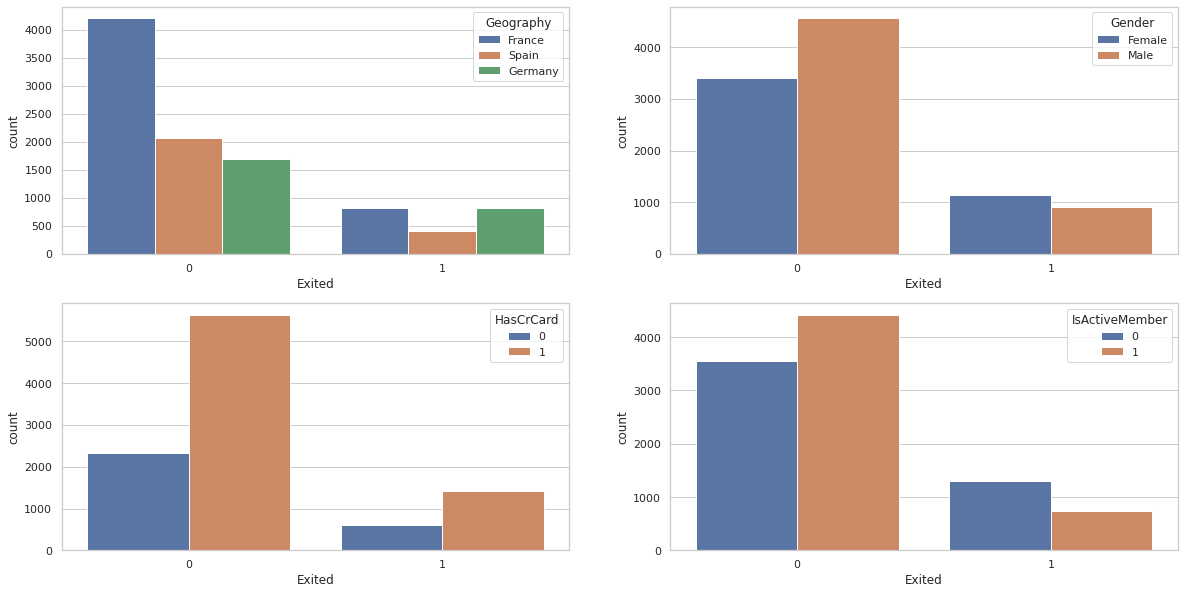

In [16]:
# explore categorical feature
sns.set_theme(style="whitegrid")
_,axes = plt.subplots(2,2, figsize=[20,10])
sns.countplot(x='Exited', hue='Geography', data=df, ax=axes[0][0]) 
sns.countplot(x='Exited', hue='Gender', data=df, ax=axes[0][1])  
sns.countplot(x='Exited', hue='HasCrCard', data=df, ax=axes[1][0]) 
sns.countplot(x='Exited', hue='IsActiveMember', data=df, ax=axes[1][1])
display()

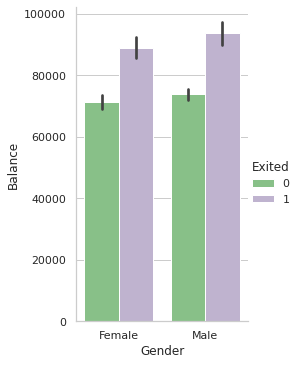

In [17]:
sns.set_theme(style="whitegrid")
sns.catplot(x="Gender", y="Balance", hue="Exited", aspect=0.7, kind="bar", data=df, palette='Accent')
display()

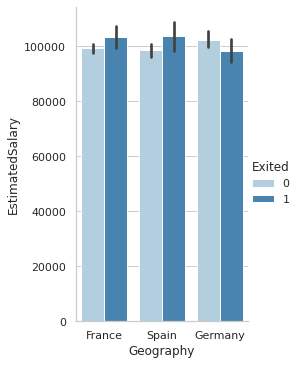

In [18]:
sns.catplot(x="Geography", y="EstimatedSalary", hue="Exited", aspect=0.7, kind="bar", data=df, palette='Blues')
display()

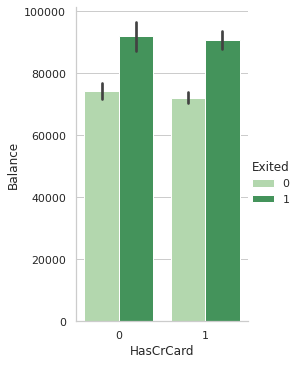

In [19]:
sns.set_theme(style="whitegrid")
sns.catplot(x="HasCrCard", y="Balance",hue="Exited", aspect=0.7, kind="bar", data=df, palette='Greens')
display()

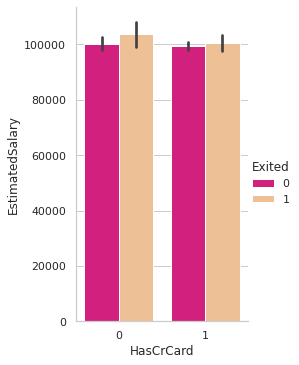

In [20]:
sns.catplot(x="HasCrCard", y="EstimatedSalary", hue="Exited", aspect=0.7, kind="bar", data=df, palette='Accent_r')
display()

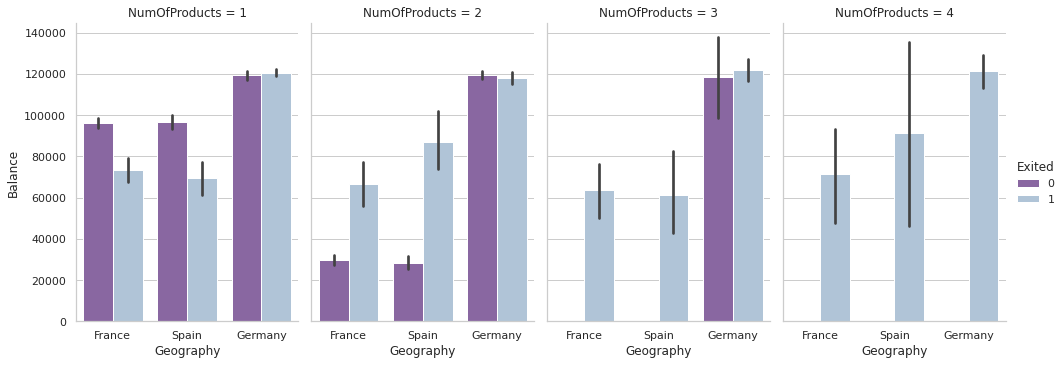

In [21]:
sns.catplot(x="Geography", y="Balance", hue="Exited", col="NumOfProducts", aspect=.7, kind="bar", data=df, palette='BuPu_r')
display()

#### **Observations from Columns:** ####
*   Customers who are order than 39 years old have churned than those between 30 and 40 years old.
*   Customers who have longer tenure prefer to cancel accounts.
*   It seems that customers who have ZERO balance or never activate their accounts rather left.
*   For the customers whose balance is between \$25\,000 and \\$220\,000, the less products they own, the more likely they have churned.
*   General speaking, Frenchmen would like to hold the accounts while Spanishes perfer churning.   
However, Frenchmen and Spanishes whose salaries were estimated more than \$100,000 are more likely to have churned. As opposed to this, Germans are more likely to have retained.
*   Female slightly prefer churning while male prefer retaining.   
But both genders who have $8000 balance are more likely to have churned.
*   A great many redit card owners and active members kept their accounts.
*   As for those whose balance is more than \\$90\,000, no matter they own credit cards or not, they have still churned.  
But for those whose balance is greater than or equal to \$100,000, they have churned without credit cards.















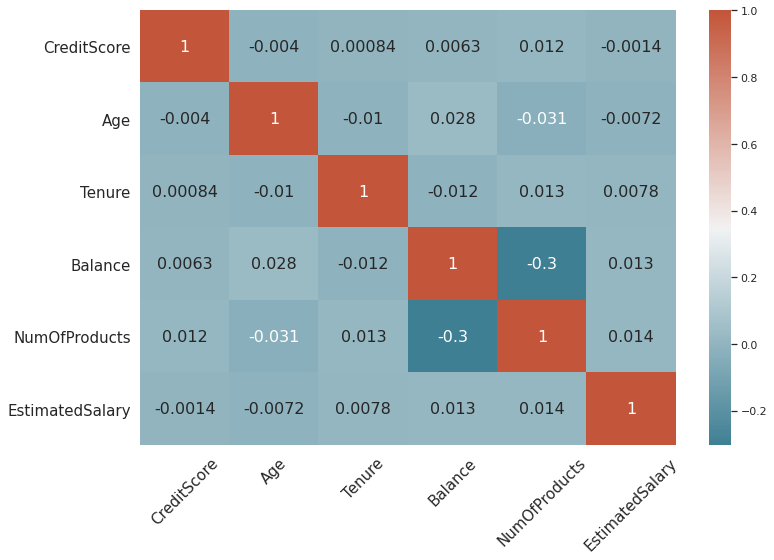

In [22]:
# correlations between features
corr_score = df[df.select_dtypes(include=np.number).columns].corr()
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(corr_score, annot = True, annot_kws = {'fontsize': 16}, cmap=cmap)
plt.tick_params(axis = 'x', rotation = 45, labelsize=15)
plt.tick_params(axis = 'y', labelsize=15)
display()

## 2. Feature Preprocessing

In [24]:
# Get target variable
y = df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: object

In [25]:
y = y.astype('int')

In [26]:
X = df.drop('Exited', axis = 1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [27]:
# separate categorical and numeric columns
cat_cols = X.columns[X.dtypes == 'O']
num_cols = X.columns[(X.dtypes == 'int64') | (X.dtypes == 'float64')]

In [28]:
print("Numerical Columns:")
print(list(num_cols))
print("Categorical Columns:")
print(list(cat_cols))

Numerical Columns:
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Categorical Columns:
['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']


####Split dataset into training and test datasets by applying sklearn with **stratify** strategy

In [29]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, stratify = y, random_state=1)
# we need to apply stratify here in case that either of split datasets are imbalanced.

print('Training dataset has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('Test dataset has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

Training dataset has 7500 observation with 10 features
Test dataset has 2500 observation with 10 features


In [30]:
# Ont Hot Encoding for 'Geography'
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names(categories))

  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Geography']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories]) # Only apply on training data!

X_train = OneHotEncoding(X_train, enc_ohe, categories) 
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [31]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,Male,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,Female,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,Female,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,Female,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,Female,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [32]:
# Ordinal Encoding for Gender
from sklearn.preprocessing import OrdinalEncoder

categories = ['Gender']
enc_oe = OrdinalEncoder()
enc_oe.fit(X_train[categories]) 
# It's same encoding method as above but not that complicated. Because it is converted Gender into numerics inplace.

X_train[categories] = enc_oe.transform(X_train[categories]) 
X_test[categories] = enc_oe.transform(X_test[categories]) 

In [33]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,633,1.0,42,10,0.00,1,0,1,79408.17,0.0,0.0,1.0
1,708,0.0,23,4,71433.08,1,1,0,103697.57,0.0,1.0,0.0
2,548,0.0,37,9,0.00,2,0,0,98029.58,1.0,0.0,0.0
3,645,0.0,48,7,90612.34,1,1,1,149139.13,1.0,0.0,0.0
4,729,0.0,45,7,91091.06,2,1,0,71133.12,0.0,0.0,1.0


In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols]) 

X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [35]:
X_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.172985,1.0,0.289202,1.731199,-1.218916,-0.912769,0,1,-0.352044,0.0,0.0,1.0
1,0.602407,0.0,-1.509319,-0.341156,-0.076977,-0.912769,1,0,0.072315,0.0,1.0,0.0
2,-1.051762,0.0,-0.184093,1.385806,-1.218916,0.796109,0,0,-0.026711,1.0,0.0,0.0
3,-0.048922,0.0,0.857156,0.695022,0.229625,-0.912769,1,1,0.866221,1.0,0.0,0.0
4,0.819517,0.0,0.573179,0.695022,0.237278,0.796109,1,0,-0.496617,0.0,0.0,1.0


## 3. Model Training and Result Evaluation

###3.1. Model Training

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Logistic Regression
logr = LogisticRegression()

# K Nearest Neighbors
knn = KNeighborsClassifier()

# Random Forest
rf = RandomForestClassifier(max_depth=2, random_state=0)

In [38]:
# Train the logistic regression model
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
# Prediction of test data
logr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
# Accuracy of test data
logr.score(X_test, y_test)

0.8092

In [41]:
# Use 5-fold Cross Validation to get the accuracy for different models
from sklearn.model_selection import cross_val_score

model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [logr, knn, rf]
count = 0

for classifier in model_list:
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5) # 5-fold CV
    print(str(model_names[count]) + ' CV Scores:')
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(round(cv_score.mean(), 3)))
    count += 1

Logistic Regression CV Scores:
[0.82       0.80666667 0.80666667 0.80933333 0.81933333]
Model accuracy of Logistic Regression is 0.812
KNN CV Scores:
[0.846      0.854      0.83       0.82866667 0.83066667]
Model accuracy of KNN is 0.838
Random Forest CV Scores:
[0.81133333 0.80733333 0.804      0.80333333 0.81      ]
Model accuracy of Random Forest is 0.807


###3.2: Use Grid Search to Find Optimal Hyperparameters (optional)
Alternative: Random Search

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

####3.2.1. Find Optimal Hyperparameters - Logistic Regression

In [76]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01, 1, 5, 10,100)
} 

Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'), parameters, cv=5) 
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 1, 5, 10, 100), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
# the best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8125333333333333
Best parameters set:
C:1
penalty:l1


In [90]:
# best model
best_LR_model = Grid_LR.best_estimator_
best_LR_model

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
best_LR_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
best_LR_model.score(X_test, y_test)

0.8096

####3.2.2. Find Optimal Hyperparameters: KNN

In [81]:
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8464
Best parameters set:
n_neighbors:9


In [89]:
best_KNN_model = Grid_KNN.best_estimator_
best_KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

####3.2.3. Find Optimal Hyperparameters: Random Forest

In [84]:
parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [85]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.8656
Best parameters set:
max_depth:10
n_estimators:80


In [88]:
# best random forest
best_RF_model = Grid_RF.best_estimator_
best_RF_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###3.3. Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)
 

1.   class of interest as POSITIVE -- Churn
2.   TP: correctly labeled real churn --- real churn 
     FP: falsely labeled churn --- real retain
     FN: falsely labeled retain --- real churn

> Precision(PPV, positive predictive value): tp / (tp + fp)
*   High Precision means low fp, not many return users were predicted as churn users. 

> Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
*   Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users. 


3. **The high costing error is that those churned customers being predicted as retained and we did not look into what reasons cause them to churn.** Therefore, a **high recall model** is required for this prediciton to avoid lossing customers.














In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [129]:
# Confusion matrix
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]
confusion_matrices

[('Random Forest', array([[1942,   49],
         [ 303,  206]])), ('Logistic Regression', array([[1925,   66],
         [ 410,   99]])), ('K nearest neighbor', array([[1895,   96],
         [ 304,  205]]))]

In [142]:
# accuracy, precison and recall for random forest, logistic regression and KNN
def cal_evaluation(classifier, cm):    # cm = [[tn, fp]
    tn = cm[0][0]                      #       [fn, tp]]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print(classifier)
    print("Accuracy is: " + str(accuracy))
    print("precision is: " + str(precision))
    print("recall is: " + str(recall))
    print("===============================")

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Retain','Churn']
    for classifier_cm in confusion_matrices: # classifier_cm = (classifier, cm); cm is matrix
        classifier, cm = classifier_cm[0], classifier_cm[1] # cm[0]=classificer; cm[1]=[[tn, fp], [fn, tp]]; separate classifier and matrix
        cal_evaluation(classifier, cm)

draw_confusion_matrices(confusion_matrices)

Random Forest
Accuracy is: 0.8592
precision is: 0.807843137254902
recall is: 0.40471512770137524
Logistic Regression
Accuracy is: 0.8096
precision is: 0.6
recall is: 0.1944990176817289
K nearest neighbor
Accuracy is: 0.84
precision is: 0.6810631229235881
recall is: 0.4027504911591356


###3.4. Model Evaluation - ROC & AUC
Probability estimates for RandomForestClassifier, KNeighborsClassifier and LogisticRegression by applying predict_prob() function

####3.4.1. ROC of RF Model

In [139]:
from sklearn.metrics import roc_curve
from sklearn import metrics

In [145]:
best_RF_model.predict_proba(X_test) 
# Returns the probability of the sample for each class in the model, result = [[Retain, Churn]]
# matrix[:, [0]] = retain rate; matrix[:, [1]] = churn rate
# retain rate + churn rate = 1

array([[0.71749603, 0.28250397],
       [0.92422846, 0.07577154],
       [0.75409668, 0.24590332],
       ...,
       [0.85767937, 0.14232063],
       [0.94736681, 0.05263319],
       [0.89368582, 0.10631418]])

In [146]:
# Use predict_proba to get the probability results of Random Forest

y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1] # here we take the probability of Churn

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

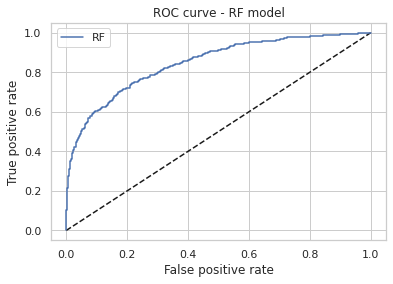

In [147]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [148]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8469853042029012

####3.4.1. ROC of LR Model

In [150]:
best_LR_model.predict_proba(X_test)

array([[0.82440034, 0.17559966],
       [0.9317291 , 0.0682709 ],
       [0.85517556, 0.14482444],
       ...,
       [0.71441121, 0.28558879],
       [0.89281272, 0.10718728],
       [0.85565383, 0.14434617]])

In [149]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)

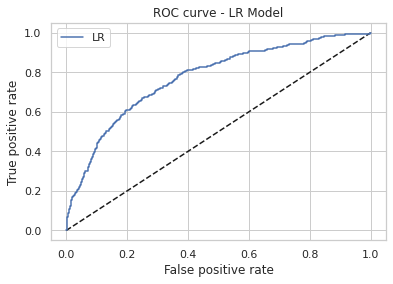

In [151]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [152]:
# AUC score
metrics.auc(fpr_lr,tpr_lr)

0.7721959031752907

####3.4.3. ROC of KNN Model

In [154]:
best_KNN_model.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       ...,
       [0.88888889, 0.11111111],
       [1.        , 0.        ],
       [1.        , 0.        ]])

In [156]:
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

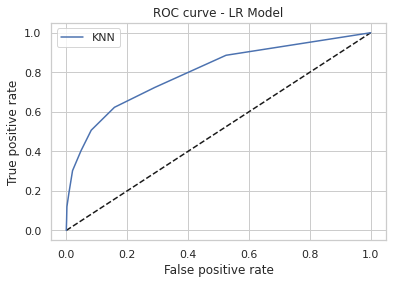

In [157]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [159]:
# AUC score
metrics.auc(fpr_knn,tpr_knn)

0.7979034338215487

##4. Model Extra Functionality

###4.1. Logistic Regression Model
*   The corelated features that we are interested in
*   Here we are going to append a new column that is converted EstimatedSalary from USD to RMB

In [177]:
X_with_corr = X.copy()
X_with_corr = OneHotEncoding(X_with_corr, enc_ohe, ['Geography'])
X_with_corr['Gender'] = enc_oe.transform(X_with_corr[['Gender']])
# insert a new column of Salary converted into Chinese RMB
X_with_corr['SalaryRMB'] = X_with_corr['EstimatedSalary'] * 6.4
X_with_corr.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,SalaryRMB
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0,648632.832
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0,720272.512
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0,729162.048
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0,600490.432
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0,506138.240


In [171]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.04, solver='liblinear')
# solver = ‘liblinear’ handle L1 penalty
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1] 
# np.argsort: returns the indices that would sort an array
# np.argsort(abs(LRmodel_l1.coef_)) returns in Matrix (shape=[1, 1]); so convert into an array by taking out the whole 1st row
# [::-1]: reverse the array

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]): # range of the numbers of columns
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]], round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.7307
IsActiveMember : -0.5046
Geography_Germany : 0.312
Gender : -0.2409
Balance : 0.1509
CreditScore : -0.0457
NumOfProducts : -0.0439
Tenure : -0.0271
EstimatedSalary : 0.0091
Geography_France : -0.0043
HasCrCard : -0.0022
SalaryRMB : 0.0002
Geography_Spain : 0.0


In [172]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.1, solver='liblinear', random_state=42)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.751
IsActiveMember : -0.5272
Gender : -0.2591
Geography_Germany : 0.2279
Balance : 0.162
Geography_France : -0.1207
Geography_Spain : -0.089
CreditScore : -0.0637
NumOfProducts : -0.0586
Tenure : -0.0452
HasCrCard : -0.0199
SalaryRMB : 0.0137
EstimatedSalary : 0.0137


###4.2. Random Forest Model - Feature Importance Discussion

In [178]:
X_RF = X.copy()
X_RF = OneHotEncoding(X_RF, enc_ohe, ['Geography'])
X_RF['Gender'] = enc_oe.transform(X_RF[['Gender']])
X_RF.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


In [179]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X_RF, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature Importance Ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X_RF.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature Importance Ranking by Random Forest Model:
Age : 0.2394
EstimatedSalary : 0.1464
CreditScore : 0.1446
Balance : 0.1436
NumOfProducts : 0.1274
Tenure : 0.0821
IsActiveMember : 0.0415
Geography_Germany : 0.0199
Gender : 0.0186
HasCrCard : 0.0178


####Insights of Coefficients:
**1.   L1 & L2**
*   The larger coefficients, the more important the features.
*   The features of Age, Geography_Germany, Balance are main effects of churn.
*   However, do NOT neglect the features of EstimatedSalary and SalaryRMB.
*   A positive sign means that all else being equal, customers related to the positive-coef features are more likely to have churned than the negative-coef ones.
*   A coefficient of ZERO for the feature means that the feature is not useful for predicting the log-odds of Y. 
*   L2 penalty is more stable so it is more frequently applied.

**2.  Feature Importance**
*   The larger importance values, the more important the features.
*   The most important features are Age, EstimatedSalary, CreditScore, Balance and NumOfProducts.
*   Try to keep as more as features possible though their values are small due to potential hidden info.









##5. Output and Conclusion
- Three models have been built up for comparisons: Random Forest, K-nearest Neighbors and Logistic Regression. Two methods have been applied for models implementation -- Cross Vaidation and A Grid Search for optimal hyperparameters, which are very commonly used techniques. 
- In cross validation, the best model is KNN, of which the accuracy is 0.838. 
- In Grid Search, the best model is Random Forest, of which accuracy = 0.8592, AUC = 0.847 and best score = 0.8656. Best parameters set: max_depth = 10, n_estimators = 80.


